In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy
import pylab
import math
import random
import pandas as pd
import sklearn
from sklearn.cluster import KMeans
from IPython.display import display
from scipy.stats import skew

import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as pyo
from sklearn.linear_model import LinearRegression

import statsmodels as sm
import ipywidgets as widgets

%matplotlib inline
sns.set()

In [2]:
df = pd.read_excel('Выборка_ектб.xlsx', sheet_name = 0)
df

,ID,Мусор,Агрегатор,LN(Цена),Цена,Цена_перв,Прогноз_1,Прогноз_2,MAE,MAPE,...,Нежилые помещения на первом этаже,строение,Квартира угловая / торцевая,Способ продажи,Отделка,Название новостройки,"Корпус, строение",Тип участия,Срок сдачи,Запланирован снос
0,1_этажи,0,этажи,15.761421,7000000,7200000,7.357429e+06,7.315261e+06,-315260.780670,-0.045037,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2_этажи,0,этажи,16.231424,11200000,11400000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3_этажи,0,этажи,15.274126,4300000,4500000,4.955072e+06,4.923574e+06,-623574.436842,-0.145017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4_этажи,0,этажи,15.555977,5700000,6000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5_этажи,0,этажи,14.557448,2100000,2200000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13331,8466_авито,1,авито,15.659230,6320000,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,переуступка,NaN,ЖК «Ботаника LIFE»,NaN,другое,Сдан 4 кв. 2023,NaN
13332,8467_авито,0,авито,15.147877,3790000,0,NaN,4.253817e+06,-463816.720736,-0.122379,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13333,8468_авито,0,авито,15.054464,3452000,0,NaN,3.777030e+06,-325030.387942,-0.094157,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13334,8469_авито,0,авито,15.176487,3900000,0,NaN,3.866094e+06,33905.795052,0.008694,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = df[df['Мусор'] == 0]
#df = df[df['Выбросы'] == 0]
df = df[df['dup_res'] == 0]
#df = df[df['Многоуровневость'] == 0]
#df = df[df['Терраса'] == 0]
df.reset_index(drop = True , inplace = True )
df

,ID,Мусор,Агрегатор,LN(Цена),Цена,Цена_перв,Прогноз_1,Прогноз_2,MAE,MAPE,...,Нежилые помещения на первом этаже,строение,Квартира угловая / торцевая,Способ продажи,Отделка,Название новостройки,"Корпус, строение",Тип участия,Срок сдачи,Запланирован снос
0,1_этажи,0,этажи,15.761421,7000000,7200000,7.357429e+06,7.315261e+06,-315260.780670,-0.045037,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3_этажи,0,этажи,15.274126,4300000,4500000,4.955072e+06,4.923574e+06,-623574.436842,-0.145017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6_этажи,0,этажи,15.483217,5300000,0,6.115291e+06,6.056768e+06,-756768.110306,-0.142786,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7_этажи,0,этажи,15.679591,6450000,6490000,6.246966e+06,6.173033e+06,276967.222331,0.042941,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15_этажи,0,этажи,15.823725,7450000,7500000,7.502204e+06,7.472315e+06,-22315.213466,-0.002995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8149,8464_авито,0,авито,15.293700,4385000,0,5.291969e+06,5.297718e+06,-912718.329665,-0.208146,...,NaN,NaN,NaN,NaN,NaN,ЖК «Миллениум»,"Дом 5 (секц. А, Б)",другое,Сдан 2 кв. 2017,NaN
8150,8467_авито,0,авито,15.147877,3790000,0,NaN,4.253817e+06,-463816.720736,-0.122379,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8151,8468_авито,0,авито,15.054464,3452000,0,NaN,3.777030e+06,-325030.387942,-0.094157,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8152,8469_авито,0,авито,15.176487,3900000,0,NaN,3.866094e+06,33905.795052,0.008694,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
list(df.columns)

['ID',
 'Мусор',
 'Агрегатор',
 'LN(Цена)',
 'Цена',
 'Цена_перв',
 'Прогноз_1',
 'Прогноз_2',
 'MAE',
 'MAPE',
 'Цена(кв.м)_пр',
 'Анализ',
 'Исп',
 'Комм',
 'Цена(кв.м)',
 'Выбросы',
 'Выбросы_1',
 'Исп.1',
 'Комм.1',
 'Выбросы_2',
 'Исп.2',
 'Комм.2',
 'IsolationForest',
 'pca',
 'COPOD',
 'dup_all',
 'dup_1',
 'dup_2',
 'Пересечения',
 'dup(<=0.03)',
 'Пересечения(<=0.03)',
 'Пересечения(>0.03)',
 'dup_res',
 'ОПлощадь',
 'Оплощадь_перв',
 'Комнатность',
 'Комнатность_перв',
 'Этаж_1',
 'Этаж_2',
 'Этаж_3',
 'Этаж_4',
 'Этаж/Этажность',
 'Этажность_1',
 'Этажность_2',
 'Неточности',
 'Переменная этажность',
 'Р',
 'Р%',
 'Минжкх',
 'П',
 'Правдом',
 'П.1',
 'Этажность_перв',
 'ГП',
 'Неточности.1',
 'Р.1',
 'Минжкх.1',
 'Правдом.1',
 'Год постройки',
 'Аварийные',
 'Исп.3',
 'Ремонт_1',
 'Ремонт_перв',
 'Санузел',
 'Стены_1',
 'Стены_перв',
 'Адрес_перв',
 'Адрес',
 'Проверка номера дома',
 'Дом',
 'Дом_Ya',
 'Проверка',
 'Адрес_yandex',
 'Долгота',
 'Широта',
 'Сцепка_к',
 'Сцепка

bins: 14
Асимметрия: 0.14631939578647724


/opt/conda/python37/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/python37/lib/python3.7/site-packages/ipykernel_launcher.py:32: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




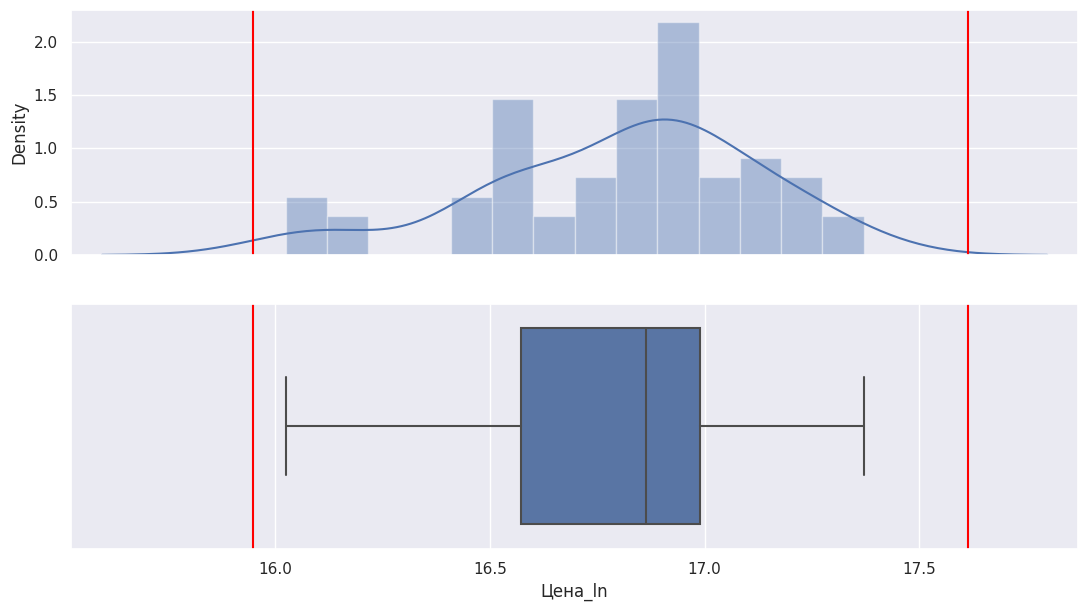

In [114]:
distr = 'Клевер_Парк'
price_col = 'Цена'   #Цена(кв.м)

multiplier = 1.5
log = True          #False

cat_data = df[df['Районы_2'] == distr] #[price_col]

bins = int(1 + 3.322 * np.log(len(cat_data)))

print('bins:', bins)
print('Асимметрия:', skew(cat_data[price_col]))

if log == True:
    cat_data[f'{price_col}_ln'] = np.log(cat_data[price_col])
    prices = cat_data[f'{price_col}_ln']
else:
    prices = cat_data[price_col]

Q1 = prices.quantile(0.25)
Q3 = prices.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - multiplier * IQR
upper_bound = Q3 + multiplier * IQR

fig, ax = plt.subplots(2, 1, figsize = (13, 7))

sns.distplot(
             prices, 
             bins = bins, 
             #axlabel = 'Было',
             ax = ax[0]
            )

sns.boxplot(
            x = prices,
            #whis = 0,
            ax = ax[1]
           )

for i in range(2):
    ax[i].axvline(
                  lower_bound,
                  color = 'red'
                 )

    ax[i].axvline(
                  upper_bound,
                  color = 'red'
                 )

ax[0].set_xlim((prices.min() - 0.5, prices.max() + 0.5))
ax[1].set_xlim((prices.min() - 0.5, prices.max() + 0.5))
ax[0].set_xticks([])
ax[0].set_xlabel(None)
    
plt.show();

Обращаю внимание, что красные границы могут не совпасть с усиками boxplot. Это является особенностью sns.boxplot. Если в наборе данных нет точек, который выходят за пределы 1.5 * IQR, то усики sns.boxplot будут соответствовать минимуму и максимуму из набора данных. Чтобы увидеть это наглядно, необходимо гиперпараметр whis = 0, и вы увидите как распределены данные. Красные границы строго показывают границы multiplier*IQR.

In [116]:
def finding_outlier(data, cat_col, price_col, method = 'iqr', multiplier = 1.5, log = True):
    '''
    data: DataFrame с данными.
    cat_col (str): Столбец с категориальным фактором, например, район города.
    price_col (str): Название столбца с ценами (руб. или кв.м/руб.).
    method (str, optional): Метод определения выбросов ('iqr' или 'zmod'). По умолчанию 'iqr'.
    multiplier (float, optional): Множитель для IQR или Z-оценки. По умолчанию 1.5 для IQR, для Z-оценки рассматривают порог 3.5.
                                  1.5 = 3 СКО, 1.75 * IQR = Zmod.
    log (bool, optional): Отвечает за логорифмирование цены (True), False - нет. По умолчанию 'True'.
    '''
    df_clean = data.copy()
    
    index_out = []

    for cat in df_clean[cat_col].unique():
        cat_data = df_clean[df_clean[cat_col] == cat]
        
        if log == True:
            cat_data[f'{price_col}_ln'] = np.log(cat_data[price_col])
            prices = cat_data[f'{price_col}_ln']
        else:
            prices = cat_data[price_col]

        if method == 'iqr':
            # Метод межквартильного размаха (IQR)
            Q1 = prices.quantile(0.25)
            Q3 = prices.quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - multiplier * IQR
            upper_bound = Q3 + multiplier * IQR
            
            # Индексы выбросов
            indexs = list(cat_data[(prices < lower_bound) | (prices > upper_bound)].index)
    
            if indexs != []:
                index_out.extend(indexs)

        elif method == 'zmod':
            # MAD
            MAD = np.abs(prices - prices.median()).median()
            # Метод измененной Z-оценки
            z_mod = np.abs((0.6745 * (prices - prices.median())) / (MAD + 1e-5))
            # Индексы выбросов
            indexs = list(cat_data[z_mod > multiplier].index)

        
        if indexs != []:
            index_out.extend(indexs)
        
    #np.array(sorted(index_out))
    outlier = np.zeros(len(df_clean), dtype = int)
    outlier[index_out] = 1

    return outlier

In [117]:
arr_out_iqr = finding_outlier(
                              data = df,
                              cat_col = 'Районы_2',
                              price_col = 'Цена',
                              method = 'iqr',
                              multiplier = 2, 
                              log = True
                             )

arr_out_iqr

/opt/conda/python37/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([0, 0, 0, ..., 0, 0, 0])

In [112]:
#Добавляем столбец с выбросами в df
df['out_iqr'] = arr_out_iqr
df[df['out_iqr'] == 1]

,ID,Мусор,Агрегатор,LN(Цена),Цена,Цена_перв,Прогноз_1,Прогноз_2,MAE,MAPE,...,Квартира угловая / торцевая,Способ продажи,Отделка,Название новостройки,"Корпус, строение",Тип участия,Срок сдачи,Запланирован снос,out_iqr,out_zmod
201,558_этажи,0,этажи,16.432906,13700000,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
367,931_этажи,0,этажи,16.677711,17500000,0,1.465770e+07,1.492999e+07,2.570009e+06,0.146858,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
407,1060_этажи,0,этажи,15.830280,7499000,0,8.134999e+06,7.956422e+06,-4.574215e+05,-0.060998,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
597,1606_этажи,0,этажи,16.565981,15650000,15900000,1.368718e+07,1.344768e+07,2.202318e+06,0.140723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
645,1760_этажи,0,этажи,15.789592,7200000,0,6.783026e+06,6.607196e+06,5.928041e+05,0.082334,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
1215,3334_этажи,0,этажи,16.325110,12300000,12800000,9.404421e+06,9.758071e+06,2.541929e+06,0.206661,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
1391,3732_этажи,0,этажи,16.897421,21800000,0,2.219097e+07,2.122128e+07,5.787157e+05,0.026547,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
1404,3762_этажи,0,этажи,16.516805,14899000,0,1.435884e+07,1.351477e+07,1.384226e+06,0.092907,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
1472,3895_этажи,0,этажи,17.182806,29000000,0,2.204806e+07,NaN,6.951945e+06,0.239722,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
2258,638_авито,0,авито,16.860033,21000000,22500000,NaN,NaN,NaN,NaN,...,NaN,свободная,NaN,NaN,NaN,NaN,NaN,NaN,1,0


In [102]:
arr_out_zmod = finding_outlier(
                               data = df,
                               cat_col = 'Районы_2',
                               price_col = 'Цена',
                               method = 'zmod',
                               multiplier = 3.5, 
                               log = True
                              )

arr_out_zmod

/opt/conda/python37/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([0, 0, 0, ..., 0, 0, 0])

In [103]:
df['out_zmod'] = arr_out_zmod
df[df['out_zmod'] == 1]

,ID,Мусор,Агрегатор,LN(Цена),Цена,Цена_перв,Прогноз_1,Прогноз_2,MAE,MAPE,...,Квартира угловая / торцевая,Способ продажи,Отделка,Название новостройки,"Корпус, строение",Тип участия,Срок сдачи,Запланирован снос,out_iqr,out_zmod
201,558_этажи,0,этажи,16.432906,13700000,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
367,931_этажи,0,этажи,16.677711,17500000,0,1.465770e+07,1.492999e+07,2.570009e+06,0.146858,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
597,1606_этажи,0,этажи,16.565981,15650000,15900000,1.368718e+07,1.344768e+07,2.202318e+06,0.140723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
807,2172_этажи,0,этажи,17.077063,26090000,26600000,2.288371e+07,2.359727e+07,2.492725e+06,0.095543,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
1215,3334_этажи,0,этажи,16.325110,12300000,12800000,9.404421e+06,9.758071e+06,2.541929e+06,0.206661,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
1391,3732_этажи,0,этажи,16.897421,21800000,0,2.219097e+07,2.122128e+07,5.787157e+05,0.026547,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
1404,3762_этажи,0,этажи,16.516805,14899000,0,1.435884e+07,1.351477e+07,1.384226e+06,0.092907,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
1472,3895_этажи,0,этажи,17.182806,29000000,0,2.204806e+07,NaN,6.951945e+06,0.239722,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
1789,4727_этажи,0,этажи,15.068274,3500000,0,3.433187e+06,3.441934e+06,5.806631e+04,0.016590,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
1790,4728_этажи,0,этажи,15.339387,4589985,0,4.930906e+06,5.031793e+06,-4.418078e+05,-0.096255,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1


In [104]:
df[df['out_zmod'] == 1]['Районы_2'].value_counts()

Новая_сортировка                 7
Заречный                         4
Химмаш                           3
Уралмаш                          3
Юго_Западный                     3
Пионерский                       3
Эльмаш                           2
Зеленая_горка                    2
Ботанический                     2
Уктус                            2
Центральный                      1
Шарташ_Калиновский_Изоплит       1
Елизавет_Рудный_Нижнеисетский    1
Комсомольский                    1
Name: Районы_2, dtype: int64

In [105]:
df[df['out_iqr'] == 1]['Районы_2'].value_counts()

Новая_сортировка                 8
Уралмаш                          5
Заречный                         4
Химмаш                           3
Елизавет_Рудный_Нижнеисетский    3
Уктус                            3
Эльмаш                           2
Юго_Западный                     2
Зеленая_Роща                     2
Ботанический                     2
Академический                    1
Центральный                      1
ВИЗ_Большеконный                 1
Шарташ_Калиновский_Изоплит       1
Комсомольский                    1
Name: Районы_2, dtype: int64

# График до/после

/opt/conda/python37/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/opt/conda/python37/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




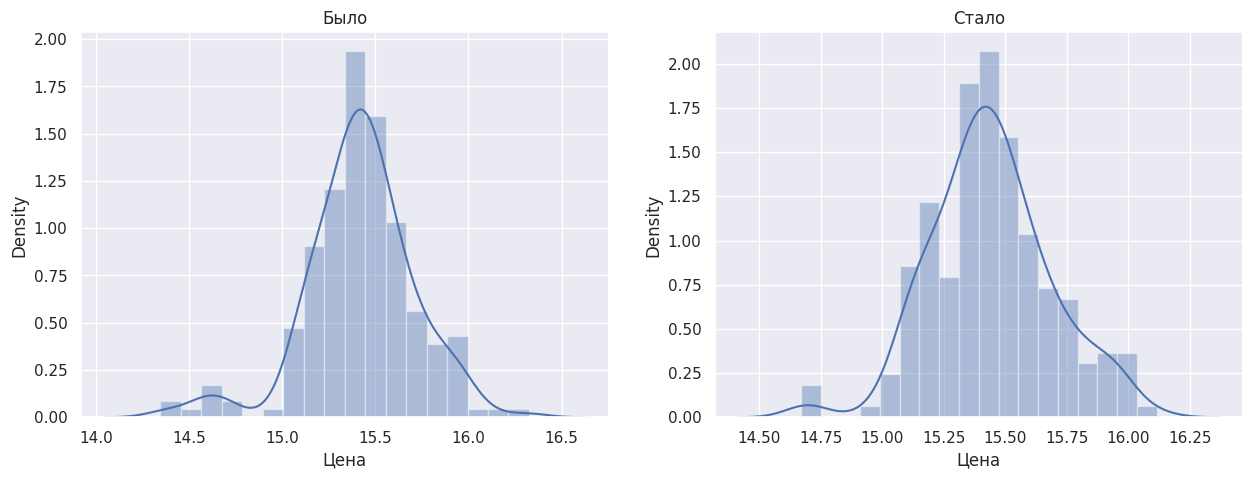

In [109]:
distr = 'Новая_сортировка'

s_1 = df['out_zmod'] == 0
s_2 = df['Районы_2'] == distr

bins = int(1 + 3.322 * np.log(len(df[s_2])))

fig, ax = plt.subplots(1, 2, figsize = (15, 5))

#Было
sns.distplot(
             np.log(df[df['Районы_2'] == distr]['Цена']), 
             bins = bins, 
             axlabel = 'Цена', 
             ax = ax[0]
            )

#Стало
sns.distplot(
             np.log(df[s_1 & s_2]['Цена']),
             bins = bins, 
             axlabel = 'Цена', 
             ax = ax[1]
            )

ax[0].set_title('Было')
ax[1].set_title('Стало')

plt.show();